# Yahoo Finance Web Scraper

This notebook will give you the Stock Indexes for 3 signatures trenging on Yahoo finance main page.

### Import neccessary libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from plotnine import *
from give_me_trend import give_me_trend
from date_conversion import date_conversion
from give_me_top3Data import give_me_top3data

### Obtain the top 3 Stock Indexes signatures of the stock market trenging on Yahoo finance's main page
Use _Give_me_trend()_ function to obtain Top 3 trending companies in Yahoo finances and their urls.
The top 3 selected may vary if you are using VPNs due to Yahoo's website performing some rerouting based on language settings.

In [2]:
trends = give_me_trend()

Create variable _urls_ with only the urls to get the last stock data for each company

In [3]:
urls = trends.iloc[:,1]

Use _give_me_top3data_ function to obtain dataframe with the stock's closing price for each url.


In [4]:
top3Table = give_me_top3data(urls)

### Restructure dataframe 

In [5]:
top3TableM = pd.melt(top3Table, id_vars = 'Date', value_vars=[top3Table.columns[1], top3Table.columns[2], top3Table.columns[3]])

### Create new table for each signature

In [13]:
top1 = top3TableM[top3TableM['variable']==top3Table.columns[1]].reset_index()
top2 = top3TableM[top3TableM['variable']==top3Table.columns[2]].reset_index()
top3 = top3TableM[top3TableM['variable']==top3Table.columns[3]].reset_index()

### Plot stock data for each company

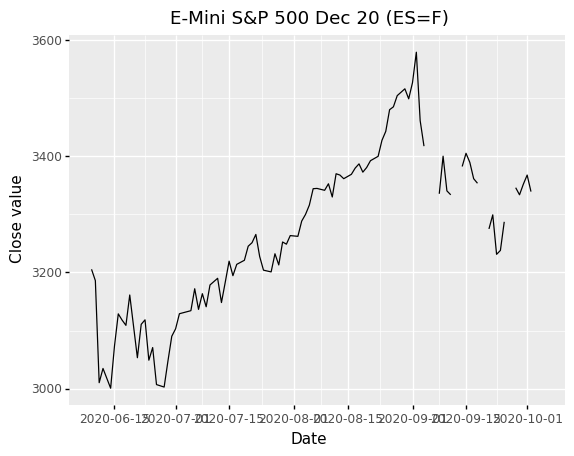

<ggplot: (136964340279)>

In [14]:
ggplot(top1) + \
    aes(x='Date', y = 'value') + \
    geom_path() + \
    ylab("Close value") + \
    ggtitle(top1['variable'][0])

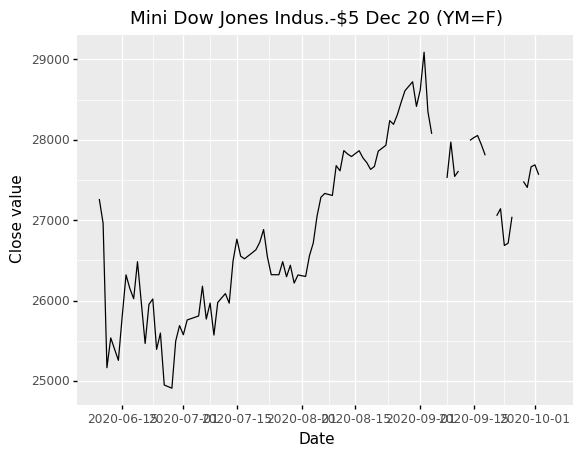

<ggplot: (136964450103)>

In [15]:
ggplot(top2) + \
    aes(x='Date', y = 'value') + \
    geom_path() + \
    ylab("Close value") + \
    ggtitle(top2['variable'][0])

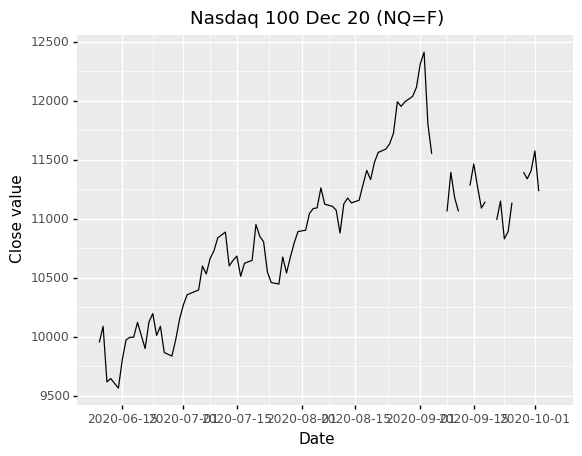

<ggplot: (136964359816)>

In [16]:
ggplot(top3) + \
    aes(x='Date', y = 'value') + \
    geom_path() + \
    ylab("Close value") + \
    ggtitle(top3['variable'][0])

### Plot the closing values of the 3 top signatures in the same graph

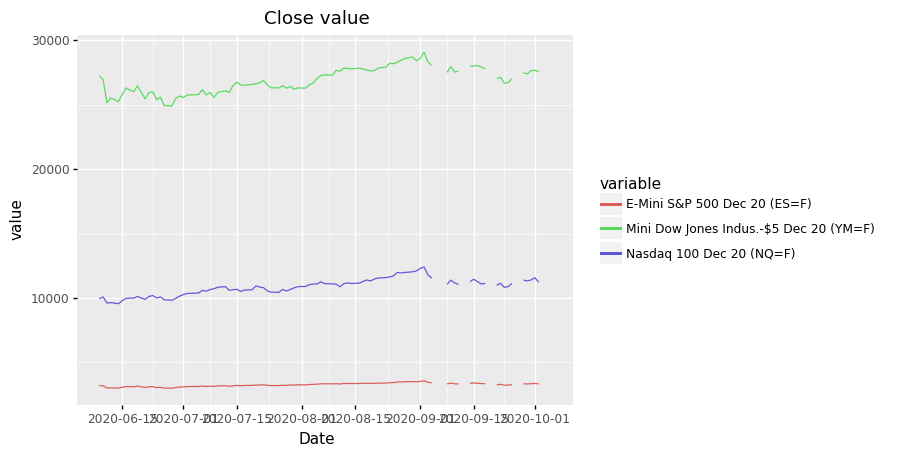

<ggplot: (136963930119)>

In [17]:
ggplot(top3TableM) + \
    aes(x='Date') + \
    geom_line(aes(y=top3TableM.value, color=top3TableM.variable)) + \
    ggtitle("Close value")